In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Network Architecture

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255 # what is this?
test_images = test_images.reshape((10000, 28*28))

In [29]:
test_images = test_images.astype('float32') / 255

In [30]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) # epochs?

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0215 - accuracy: 0.9939
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9947
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0103 - accuracy: 0.9969


### Prediction

In [42]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 13ms/step


array([8.6114128e-12, 4.7457220e-13, 1.8718039e-08, 6.5285516e-05,
       1.7810338e-14, 9.5765862e-10, 7.0715929e-20, 9.9993443e-01,
       6.3050794e-11, 2.6449925e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.99998033

In [15]:
test_labels[0]

7

1

784

In [55]:
print(type(test_images[4]))
print(type(test_images[0:4]))
print(test_images[0].shape)
print(test_images[0:1].shape)
print(len(test_images[0]))
print(len(test_images[0:1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(784,)
(1, 784)
784
1


#### Evaluating

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}') # acc = accuracy

313/313 [==============================] - 0s 721us/step - loss: 0.0699 - accuracy: 0.9793
test_acc: 0.9793000221252441


## Data representations for neural networks

In [17]:
import numpy as np
### Scalars
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

In [19]:
### Vectors
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [20]:
### Matrices
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
])
x.ndim

2

In [21]:
### Rank-3 tensors
x = np.array([
    [
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ],
    [
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
    ],
    [
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
]])
x.ndim

3

### Key Attributes

In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [66]:
import matplotlib.pyplot as plt
the_4th_image = train_images[4:5] # each image is 28x28 pixels, each pixel is 0-255. 
print(the_4th_image[0].shape)

(784,)


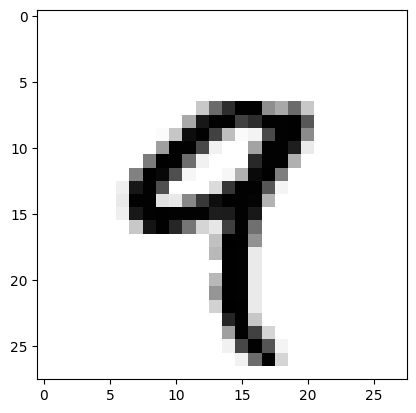

In [73]:
digit = train_images[4:5]
plt.imshow(digit[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
# This doesn't work because
# plotting requires shape to be 28x28
# while the digit is already reshaped to 784x1
# doing a "reshape" solve the issue.

In [74]:
pred = model.predict(train_images[4:5])

1/1 [==============================] - 0s 12ms/step


In [75]:
pred.argmax()

9

In [76]:
print(pred)

[[2.1455495e-15 1.1061474e-09 8.6403792e-12 5.8674757e-08 1.6586297e-05
  7.3305024e-09 4.1554481e-14 4.4419554e-08 1.3928963e-07 9.9998319e-01]]


### 2.2.6 Manupulating tensors in NumPy

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice2 = train_images[10:100, :, :]
print(my_slice2.shape)
my_slice3 = train_images[10:100, 0:28, 0:28]
print(my_slice3.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


In [8]:
my_slice4 = train_images[:, 14:, 14:]
print(my_slice4.shape)
my_slice5 = train_images[:, 7:-7, 7:-7]
print(my_slice5.shape)

(60000, 14, 14)
(60000, 14, 14)


---
### 2.2.7 The notion of data batches

- Sample axis(dimension): The "N" dimension in the "NCHW" format.
- Batch: a group of samples. Deep/Machine Learning will process a batch at a time.

In [9]:
batch = train_images[:128]
batch2 = train_images[128:256]

---
### 2.2.8 Real-world examples of data tensors

- Vector
- TimeSeries or Sequence
- Images
- Video

---

## 2.3 The gears of neural neworks: Tensor operations
Here's a kera layer

In [12]:
from tensorflow import keras
keras.layers.Dense(512, activation='relu')

If we interpret it as a function, it would be
$$ output = relu(matmul(input, w) + b) $$

### 2.3.1 Element-wise operations

Relu: Rectified linear unit.

For each $x_{ij}$ in a sample $x$, $x_{ij} = max(x_{ij}, 0) $.

In the following case, x is a 2D tensor (usually image).

In [10]:
# Relu: 
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] == max(x[i, j], 0)
    return x

In [18]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = x[i][j] + y[i][j]
    return x

Similarly, you can do element-wise multiplication, subtraction, and so on.

Element-wise operation in numpy


In [14]:
# element-wise op in numpy
import numpy as np
x = 1
y = 3
z = x + y
z = np.maximum(z, 0.)
print(z)

4.0


`np.maximum()` greatly improves the time consumed. See below

In [67]:
import time
# First check "for-loop" method
x = np.random.random((1000, 1000))
y = np.random.random((1000, 1000))
t0 = time.time_ns()
print(t0)
z = naive_add(x, y)
t1 = time.time_ns()
print(t1)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i][j] = max(z[i][j], 0)
t2 = time.time_ns()
print(t2)
print("Add took: {0:.4f} ms".format((t1 - t0)/1000000)) # about 1ms
print("relu took: {0:.4f} ms".format((t2 - t1)/1000000)) # about 1ms
# sometimes (t0 and t1), or (t1 and t2) will be the same. Not sure why but it doesn't mean naive_relu cost no time. 

1672220891369166800
1672220891670293800
1672220891979309200
Add took: 301.1270 ms
relu took: 309.0154 ms


In [66]:
# Now check np method
x = np.random.random((1000, 1000))
y = np.random.random((1000, 1000))
t0 = time.time_ns()
z = np.add(x, y)
t1 = time.time_ns()
z = np.maximum(z, 0.)
t2 = time.time_ns()
print("Add took: {0:.4f} ms".format((t1 - t0)/10**6))
print("relu took: {0:.4f} ms".format((t2 - t1)/10**6))

Add took: 2.5069 ms
relu took: 2.0005 ms


**Conclusion**: NumPy is about 100x faster

----


### 2.3.2 Broadcasting

The smaller tensor will be broadcast to match the shape of larger tensor


In [68]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10, ))

# add empty axis to y
y = np.expand_dims(y, axis=0)
print(y.shape)

# duplicate values
Y = np.concatenate([y] * 32, axis=0)
print(Y.shape)

(1, 10)
(32, 10)


In [70]:
import numpy as np
x = np.random.random((10, 6, 32, 10))
y = np.random.random((32, 10))
z = np.add(x, y)
print(z.shape)

(10, 6, 32, 10)



### 2.3.3 Tensor product


In [74]:
import numpy as np
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(z.shape)

()


In [78]:
# review tensor product
def naive_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        mul = x[i] * y[i]
        z += mul
    return z

z0 = naive_dot(x, y)
print(z0)

8.382781491151169


---

### 2.3.4 Tensor Reshaping

In [83]:
import numpy as np
x0 = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])
print(x0.shape)

x1 = x0.reshape((6,1))
print(x1)

x2 = x0.reshape((6, ))
print(x2)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[0. 1. 2. 3. 4. 5.]


**Attention !!!!**

In `np.array`, the format is ***NCHW***

`np.array.shape = (..., N, C, H, W)`

In [84]:
x3 = x0.reshape((2,3))
print(x3)

x4 = x0.transpose()
print(x4)

[[0. 1. 2.]
 [3. 4. 5.]]
[[0. 2. 4.]
 [1. 3. 5.]]


---

### 2.3.5 Geometric Interpretation of Tensor Operations

### 2.3.6 A Geometric Interpretation of Deep Learning

---
---

## 2.4 The Engine of Neural Networks: Gradient-Based Optimization

weights | trainable parameters | kernel & bias

random initialization

training

training loop

Steps
1. get a batch of samples `x`, and corresponding targets `y_true`
2. run model on `x` (forward pass), obtain predictions `y_pred`
3. Compute `loss`, a measure of distance between `y_pred` and `y_true`
4. update `weights` that slightly reduce the `loss`

---

### 2.4.1 What's a derivative?

### 2.4.2 Derivative of a tensor operation: The gradient

---

### 2.4.3 Stochastic gradient descent